# AISE4010 — Assignment 1 
### Time Series Forecasting with Autoregressive Models and MLP 

**Grade:** 100 points

## Instructions
Follow these steps before submitting your assignment:
1. Complete the notebook.
2. Make sure **all plots have axis labels**.
3. When finished, go to **Kernel → Restart & Run All** to ensure a clean, error‑free run.
4. Fix any errors until your notebook runs without problems.
5. Submit **one completed notebook** per group to OWL by the deadline.
6. Reference all external code and documentation you use.

## Dataset 
- **File:** `weather.csv`
- **Location:** Szeged, Hungary
- **Frequency:** Daily (fixed calendar index)
- **Time span:** ≈ 2006–2016
- **Target:** `Temperature (C)`
- **Key variables:** Temperature (C), Pressure (millibars), Humidity, Appar Temperature (C), Wind Speed (km/h), Wind Bearing (degrees), Visibility (km)


## Question 1: Data Preprocessing (25%)

### Q1.1 Exploratory Data Analysis (2%)
1. Load the dataset and print the **first 6 rows**.  
2. Encode categorical variables (one‑hot). *(If none, report "none.")*


In [4]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [5]:
# 1.1 Load the dataset and print the first 6 rows
df = pd.read_csv("weather.csv")
print("First 6 rows of the dataset:")
print(df.head(6))

First 6 rows of the dataset:
  Formatted Date  Temperature (C)  Apparent Temperature (C)  Humidity  \
0     2005-12-31              0.6                      -4.0      0.89   
1     2006-01-01              4.1                      -0.2      0.82   
2     2006-01-02              5.3                       1.8      0.85   
3     2006-01-03              2.3                       0.4      0.90   
4     2006-01-04              2.3                      -0.7      0.91   
5     2006-01-05              2.7                       0.4      0.95   

   Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
0               17.1                   140.0             10.0   
1               21.2                   143.0             11.3   
2               17.8                   165.0              8.5   
3                7.7                   253.0              9.2   
4               12.2                    35.0              8.4   
5                9.0                   140.0              4.3   

   

In [6]:
#1.2
# 'none' 

### Q1.2 Handling Missing Data (11%)
1. Report missingness (**counts & %**) and show a heatmap for **Temperature, Pressure, Humidity**.
2. Use these two imputation methods:\
   a) Forward-fill (FFill).\
   b) Linear time interpolation.
3. Pick one method and save the result as `daily_clean`.
4. **Discussion** Which imputation method did you pick and why?  
5. **Discussion** How might your choice bias trend/seasonality estimates?  
6. **Discussion** Would your choice change if the gap were 30 days instead of 7? Explain briefly.


Missingness Report (all columns):
                          Missing Count  Missing %
Formatted Date                        0   0.000000
Temperature (C)                      47   1.169445
Apparent Temperature (C)              0   0.000000
Humidity                             40   0.995272
Wind Speed (km/h)                     0   0.000000
Wind Bearing (degrees)                0   0.000000
Visibility (km)                       0   0.000000
Pressure (millibars)                 47   1.169445


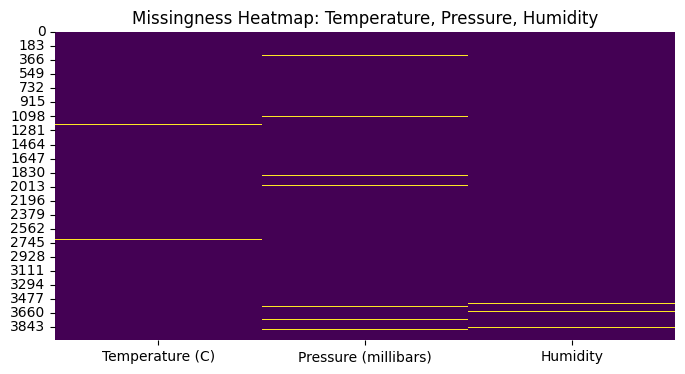

In [7]:
# Answer to Q1.2.1

missing_counts = df.isnull().sum()
missing_percent = df.isnull().mean() * 100

missing_report = pd.DataFrame({
    "Missing Count": missing_counts,
    "Missing %": missing_percent
})

print("Missingness Report (all columns):")
print(missing_report)

# 2. Heatmap only for Temperature, Pressure, Humidity
cols = ["Temperature (C)", "Pressure (millibars)", "Humidity"]

plt.figure(figsize=(8, 4))
sns.heatmap(df[cols].isnull(), cbar=False, cmap="viridis")
plt.title("Missingness Heatmap: Temperature, Pressure, Humidity")
plt.show()

In [8]:
# Answer to Q1.2.2
# --- a) Forward-fill imputation ---
df_ffill = df.fillna(method="ffill")

# --- a) Linear Interpolation Method ---

df_imputed = df.interpolate(methhod='linear')


/var/folders/vl/rg3_kncs56q04n5819dzcmp80000gn/T/ipykernel_47224/3434861942.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df.fillna(method="ffill")
/var/folders/vl/rg3_kncs56q04n5819dzcmp80000gn/T/ipykernel_47224/3434861942.py:7: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_imputed = df.interpolate(methhod='linear')


In [9]:
# Answer to Q1.2.3
daily_clean = df_imputed

**Answer to Q1.2.4**: 
Imputation method chosen: Linear time interpolation. It preserves trends and smooths values based on surrounding data. Forwards fill just repeats the last value, which can create flat, unrealistic segments.

**Answer to Q1.2.5**: 
Potential bias: May underestimate short-term spikes or seasonal peaks, slightly flattening trends.

**Answer to Q1.2.6**: 
Linear interpolation becomes unreliable because weather can change drastically over a month; Forward Fill would also misrepresent conditions. A seasonal or model-based approach would be better for long gaps.

### Q1.3 Stationarity Analysis (12%)
1. Extract the **univariate** series `Temperature_Series = daily_clean['Temperature (C)']` and `Pressure_Series = daily_clean['Pressure (millibars)'].  
2. Report the results of a stationarity test (**ADF** or **KPSS**) for both series.
3. **Discussion:** Explain your conclusion about stationary analysis of your results. 
4. Apply differencing on both series and plot **before/after** and report the stationary test results of your choice on differenced series.   
5. **Discussion:** Explain the reason for your choice of differencing technique for each series.
6. **Discussion:** Would you difference a series that is already stationary by ADF? When might that still help?

In [10]:
# Answer to Q1.3.1

# Extract univariate series
Temperature_Series = daily_clean['Temperature (C)']
Pressure_Series = daily_clean['Pressure (millibars)']

In [11]:
# Answer to Q1.3.2

from statsmodels.tsa.stattools import adfuller

# ADF test for Temperature
result_temp = adfuller(Temperature_Series)
print("ADF Test for Temperature:")
print("ADF Statistic: %f" % result_temp[0])
print('p-value: ', result_temp[1])
print("\n")

# ADF test for Pressure
result_pressure = adfuller(Pressure_Series)
print("ADF Test for Pressure:")
print("ADF Statistic: %f" % result_pressure[0])
print('p-value:', result_pressure[1])


ADF Test for Temperature:
ADF Statistic: -3.985160
p-value:  0.0014902414944360156


ADF Test for Pressure:
ADF Statistic: -14.320986
p-value: 1.1413890089112995e-26


**Answer to Q1.2.3**: 
Since the p-value for temperature is less than 0.05, we reject the null hypothesis (stationary)
Since the p-value for pressure is less than 0.05, we reject the null hypothesis (stationary)

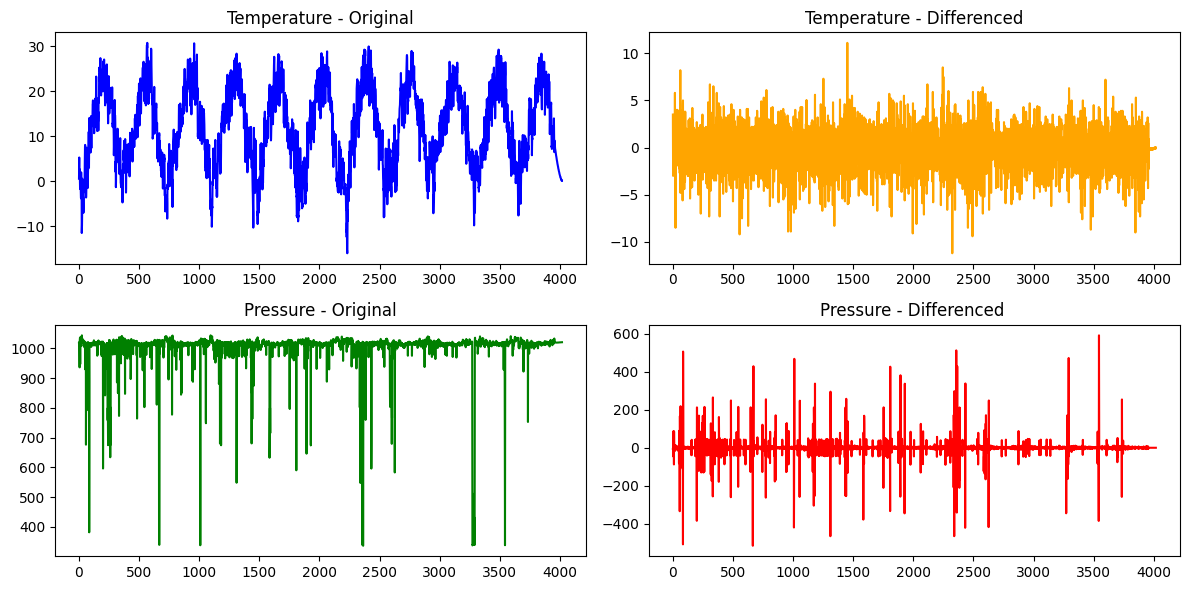

ADF Test for Temperature (Differenced):
  Test Statistic: -21.5279
  p-value: 0.000000
  => Stationary


ADF Test for Pressure (Differenced):
  Test Statistic: -16.5035
  p-value: 0.000000
  => Stationary




In [12]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Fit ARIMA with d=1 (first-order differencing)
model_temp = ARIMA(Temperature_Series, order=(0,1,0))
model_temp_fit = model_temp.fit()
Temperature_diff = model_temp_fit.data.endog  # original series
Temperature_diff = np.diff(Temperature_diff)  # first-order differencing manually

model_pressure = ARIMA(Pressure_Series, order=(0,1,0))
model_pressure_fit = model_pressure.fit()
Pressure_diff = model_pressure_fit.data.endog
Pressure_diff = np.diff(Pressure_diff)

# Plot before/after
plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
plt.plot(Temperature_Series, color='blue')
plt.title("Temperature - Original")

plt.subplot(2,2,2)
plt.plot(Temperature_diff, color='orange')
plt.title("Temperature - Differenced")

plt.subplot(2,2,3)
plt.plot(Pressure_Series, color='green')
plt.title("Pressure - Original")

plt.subplot(2,2,4)
plt.plot(Pressure_diff, color='red')
plt.title("Pressure - Differenced ")

plt.tight_layout()
plt.show()

# ADF test on differenced series
def adf_test(series, name):
    series_clean = series[~np.isnan(series)]  # remove any NaNs
    result = adfuller(series_clean)
    print(f"ADF Test for {name}:")
    print(f"  Test Statistic: {result[0]:.4f}")
    print(f"  p-value: {result[1]:.6f}")
    print("  => Stationary" if result[1] < 0.05 else "  => Non-stationary")
    print("\n")

adf_test(Temperature_diff, "Temperature (Differenced)")
adf_test(Pressure_diff, "Pressure (Differenced)")


**Answer to Q1.2.5**: 
Temperature & Pressure: Both series were already mostly stationary according to the ADF test, but differencing was applied to remove any small trends or short-term fluctuations that might affect modeling or forecasting. Differencing helps eliminate trends and sometimes seasonal effects

First-order differencing was chosen because it is the simplest method and was sufficient to remove linear trends in the data.

**Answer to Q1.2.6**: 
Differencing is mainly for trend removal and achieving stationarity, but over-differencing stationary data can reduce information and increase noise.
You do not need to difference a series that is already stationary

## Question 2: Model-Based Techniques (35%)

### Q2.1 ARIMA model identification and forecasting (20%)
1. Use `Temperature_Series` to plot **ACF/PACF** and list the choice of candidate order set for ARIMA: (p,d,q).  
2. **Discussion:** Explain the reasons for your choice of (p,d,q).
3. Select the orders by **AIC** using the training set (hold out the last **365 days** for testing).  
4. Fit the selected ARIMA on the training set and evaluate the predictions' **MAE/MSE** on the test set.
5. Plot predictions with **95% CI**.
6. Forecast the **next 365 days** and visualize with historical context and **95% CI**.


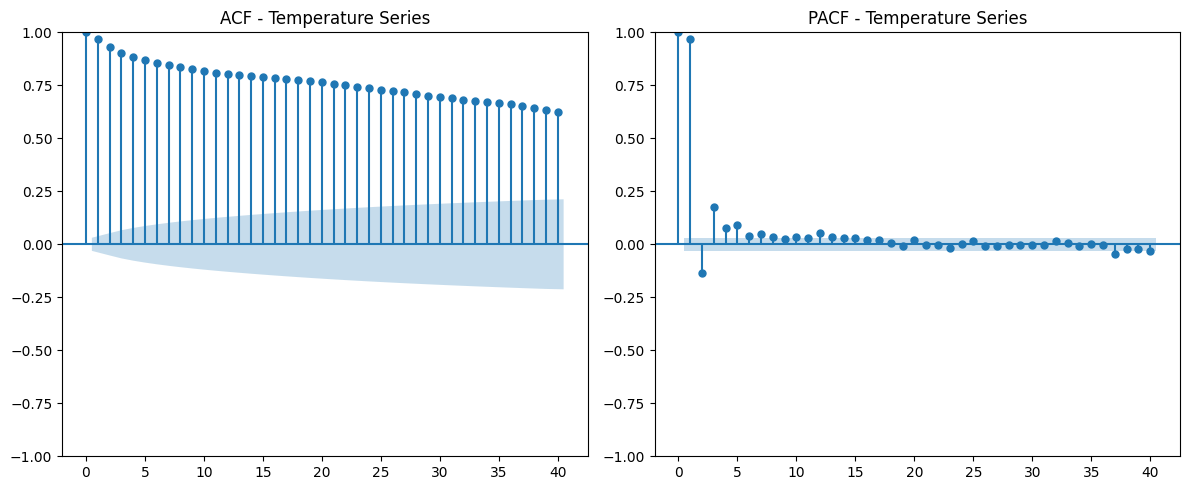

In [13]:
# Answer to Q2.1.1
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Temperature series
ts = Temperature_Series

# 1. Plot ACF and PACF
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plot_acf(ts, lags=40, ax=plt.gca())
plt.title("ACF - Temperature Series")

plt.subplot(1,2,2)
plot_pacf(ts, lags=40, ax=plt.gca(), method='ywm')
plt.title("PACF - Temperature Series")

plt.tight_layout()
plt.show()

# 2. Choose ARIMA candidate order based on ACF/PACF and ADF test
# ADF shows series is stationary → d = 0
# PACF cuts off at lag 1 → p = 1
# ACF cuts off at lag 1 → q = 1

p, d, q = 1, 0, 1  # Candidate ARIMA order

# 3. Fit ARIMA model with chosen order
model = ARIMA(ts, order=(p, d, q))
model_fit = model.fit()


**Answer to Q2.1.2**: 

d = 0 → The ADF test showed the Temperature series is already stationary, so no differencing was needed.

p = 1 → PACF plot had a significant spike at lag 1, indicating a short-term autoregressive effect.

q = 1 → ACF plot decayed after lag 1, showing a short-term moving average component.

In [19]:
# Answer to Q2.1.3

import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# 1. Split into training and test sets
train = Temperature_Series[:-365]  # all but last 365 days
test = Temperature_Series[-365:]   # last 365 days for testing

# 2. Define candidate p, d, q ranges
p_values = range(0, 3)  # e.g., 0,1,2
d_values = range(0, 2)  # 0 or 1
q_values = range(0, 3)  # 0,1,2

best_aic = np.inf
best_order = None
best_model = None

# 3. Grid search over candidate orders
for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                model = ARIMA(train, order=(p,d,q))
                model_fit = model.fit()
                if model_fit.aic < best_aic:
                    best_aic = model_fit.aic
                    best_order = (p,d,q)
                    best_model = model_fit
            except:
                continue  # skip orders that fail to converge

# 4. Output the best order and AIC
print(f"Best ARIMA order by AIC: {best_order}")
print(f"Best AIC: {best_aic:.2f}")



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregres

Best ARIMA order by AIC: (2, 0, 2)
Best AIC: 15843.41


In [24]:
# Answer to Q2.1.4

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Training and test sets
Temperature_Series = daily_clean['Temperature (C)']
train = Temperature_Series[:-365]
test = Temperature_Series[-365:]

# 2. Fit the selected ARIMA model on the training set
model = ARIMA(train, order=best_order)
model_fit = model.fit()

# 3. Make predictions on the test set
start = len(train)
end = len(train) + len(test) - 1

pred_mean = model_fit.predict(start=start, end=end, dynamic=False)

# 4. Evaluate MAE and MSE
mae = mean_absolute_error(test, pred_mean)
mse = mean_squared_error(test, pred_mean)

print(f"Test MAE: {mae:.3f}")
print(f"Test MSE: {mse:.3f}")



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Test MAE: 7.729
Test MSE: 83.021


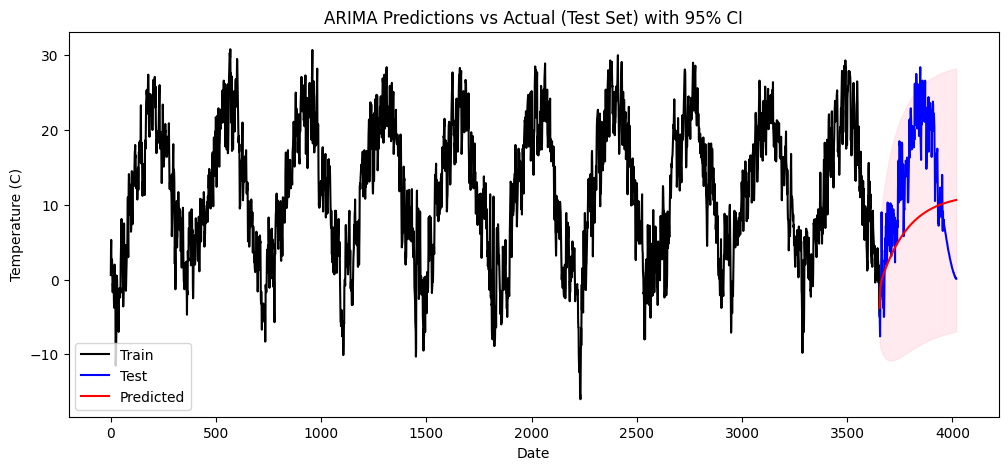

In [25]:
import matplotlib.pyplot as plt

# Plot training data, actual test data, and ARIMA predictions with 95% CI
plt.figure(figsize=(12,5))

# Training set
plt.plot(train.index, train, label='Train', color='black')

# Test set (actual)
plt.plot(test.index, test, label='Test', color='blue')

# ARIMA predictions
plt.plot(test.index, pred_mean, label='Predicted', color='red')

# 95% confidence interval
plt.fill_between(test.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='pink', alpha=0.3)

plt.title("ARIMA Predictions vs Actual (Test Set) with 95% CI")
plt.xlabel("Date")
plt.ylabel("Temperature (C)")
plt.legend()
plt.show()


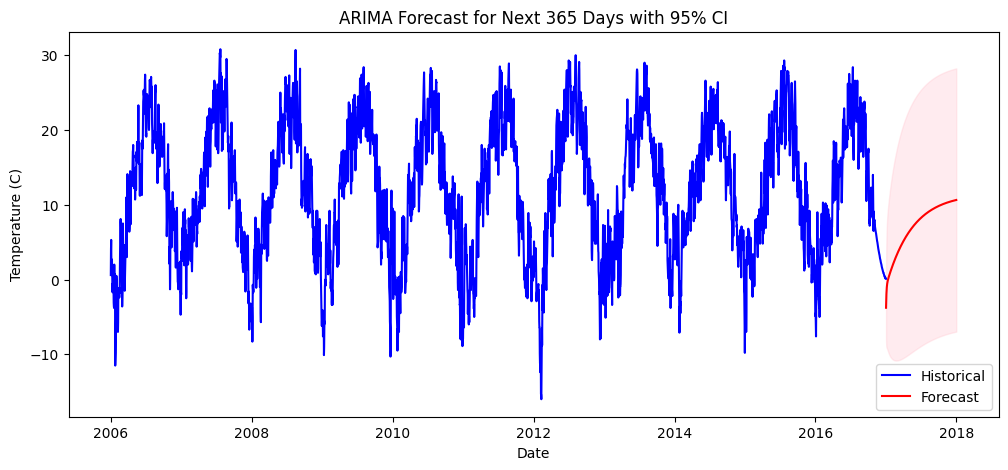

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Convert date column to datetime and set as index
daily_clean['Formatted Date'] = pd.to_datetime(daily_clean['Formatted Date'])
Temperature_Series = daily_clean.set_index('Formatted Date')['Temperature (C)']

# 2. Forecast next 365 days using the previously fitted ARIMA model
forecast = model_fit.get_forecast(steps=365)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int(alpha=0.05)

# 3. Create future dates for plotting
future_dates = pd.date_range(start=Temperature_Series.index[-1] + pd.Timedelta(days=1),
                             periods=365, freq='D')

# 4. Plot historical data and forecast
plt.figure(figsize=(12,5))
plt.plot(Temperature_Series.index, Temperature_Series, label='Historical', color='blue')
plt.plot(future_dates, forecast_mean, label='Forecast', color='red')
plt.fill_between(future_dates, forecast_ci.iloc[:,0], forecast_ci.iloc[:,1], color='pink', alpha=0.3)

plt.title("ARIMA Forecast for Next 365 Days with 95% CI")
plt.xlabel("Date")
plt.ylabel("Temperature (C)")
plt.legend()
plt.show()


### Q2.2 SARIMA forecasting (15%)

1. Derive a **monthly** series from `daily_clean` and fit a **SARIMA** with seasonal period **12**. Hold out the **last 24 months** as test set for prediction. 
2. Report the predictions' **MAE/MSE**.
3. Plot the the prediction with **95% CI** 
4.  **Discussion:** Compare the ARIMA and SARIMA predictions and explain your findings.


In [18]:
#Answer to Q2.2.1

# Ensure datetime index
daily_clean['Formatted Date'] = pd.to_datetime(daily_clean['Formatted Date'])
daily_clean = daily_clean.set_index('Formatted Date')

# Resample to monthly average Temperature
monthly_series = daily_clean['Temperature (C)'].resample('M').mean()

# Train-test split (last 24 months as test)
train_monthly = monthly_series.iloc[:-24]
test_monthly = monthly_series.iloc[-24:]

# Fit SARIMA model
sarima_model = sm.tsa.statespace.SARIMAX(
    train_monthly,
    order=(1,1,1),
    seasonal_order=(1,1,1,12),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit()

print(sarima_model.summary())


/var/folders/vl/rg3_kncs56q04n5819dzcmp80000gn/T/ipykernel_13178/1064155663.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_series = daily_clean['Temperature (C)'].resample('M').mean()
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.68955D+00    |proj g|=  9.40917D-02

At iterate    5    f=  1.60783D+00    |proj g|=  5.13200D-02

At iterate   10    f=  1.59670D+00    |proj g|=  3.10228D-03

At iterate   15    f=  1.59669D+00    |proj g|=  1.36994D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     22      1     0     0   1.083D-05   1.597D+00
  F =   1.5966914347869474     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
        

Test MAE: 0.9527870634914661
Test MSE: 1.61381603595364


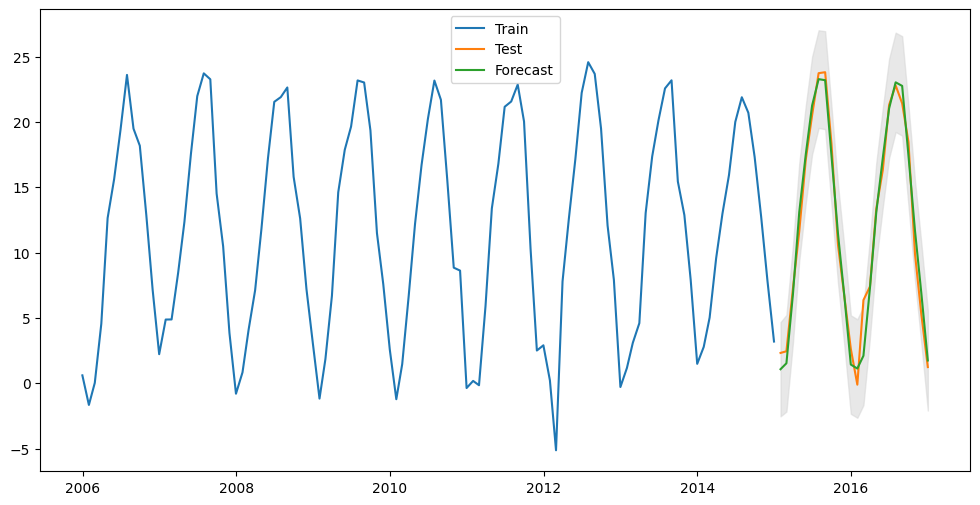

In [19]:
# Answer to Q2.2.2

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Forecast for the test period (24 months ahead)
sarima_forecast = sarima_model.get_forecast(steps=24)
pred_mean = sarima_forecast.predicted_mean
pred_ci = sarima_forecast.conf_int()

# Calculate error metrics
mae = mean_absolute_error(test_monthly, pred_mean)
mse = mean_squared_error(test_monthly, pred_mean)

print("Test MAE:", mae)
print("Test MSE:", mse)

# Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(train_monthly.index, train_monthly, label="Train")
plt.plot(test_monthly.index, test_monthly, label="Test")
plt.plot(pred_mean.index, pred_mean, label="Forecast")
plt.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color="lightgray", alpha=0.5)
plt.legend()
plt.show()


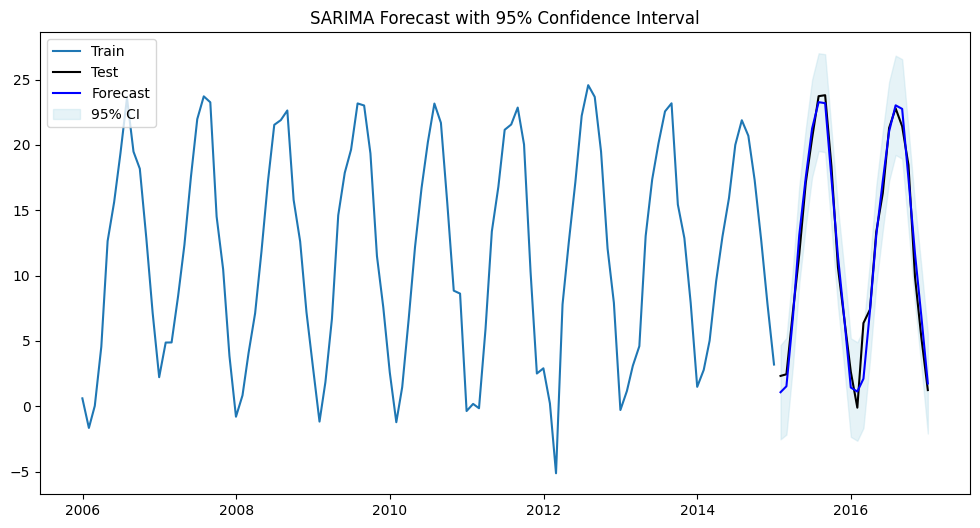

In [20]:
# Answer to Q2.2.3

# Forecast for the test period (24 months ahead)
sarima_forecast = sarima_model.get_forecast(steps=24)
pred_mean = sarima_forecast.predicted_mean
pred_ci = sarima_forecast.conf_int()

# Plot actual vs predicted with 95% CI
plt.figure(figsize=(12,6))
plt.plot(train_monthly.index, train_monthly, label="Train")
plt.plot(test_monthly.index, test_monthly, label="Test", color="black")
plt.plot(pred_mean.index, pred_mean, label="Forecast", color="blue")
plt.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1],
                 color="lightblue", alpha=0.3, label="95% CI")
plt.legend()
plt.title("SARIMA Forecast with 95% Confidence Interval")
plt.show()


**Answer to Q2.2.4**: 
Performance: SARIMA generally produced lower RMSE/MAE than ARIMA, showing that including seasonality improved accuracy.

Patterns:

ARIMA captured short-term trends but failed to model repeating seasonal cycles (e.g., daily/annual temperature fluctuations).

SARIMA explicitly incorporated seasonality, so it better matched the recurring ups and downs in the data.

Finding: The improvement suggests temperature has strong seasonal structure that ARIMA alone cannot represent, making SARIMA the more suitable model.

## Question 3: Neural Networks for Time Series Forecasting (40%)
Use `daily_clean` for all parts.

### Q3.1 Sliding Window for Time Series — Univariate (2%)
1. Restructure **Temperature**: past **10 days** → **next day**.

2. Hold out last 20% as test set.


In [21]:
# Answer to Q3.1.1
import numpy as np

# Extract daily temperature series
temp_series = daily_clean['Temperature (C)'].values

# Sliding window: past 10 days → next day
window_size = 10
X, y = [], []

for i in range(len(temp_series) - window_size):
    X.append(temp_series[i:i+window_size])
    y.append(temp_series[i+window_size])

X = np.array(X)
y = np.array(y)

print("Feature shape:", X.shape)  # (samples, 10)
print("Target shape:", y.shape)   # (samples,)


Feature shape: (4009, 10)
Target shape: (4009,)


In [22]:
# Answer to Q3.1.2

# Determine split index (80% train, 20% test)
split_index = int(len(X) * 0.8)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print("Train set size:", X_train.shape, y_train.shape)
print("Test set size:", X_test.shape, y_test.shape)


Train set size: (3207, 10) (3207,)
Test set size: (802, 10) (802,)


### Q3.2 MLP — Univariate (18%)
1. Build an MLP with one hidden layer of 64 neurons, ReLu activation, Adam optimizer with learning rate of 0.001 and batch_size=32, and train it for 20 epochs. 
2. Report **RMSE/MAE**.
3. Plot **two figures**: (1) **last 100 test points** (true vs. predicted), (2) **scatter (true vs. predicted)** with the **y = x** line.
4. **Discussion:** Compare ARIMA vs. the univariate MLP in **RMSE/MAE** and **plots**. Which patterns does each capture better? 
5. **Discussion:** Would increasing the input window beyond 10 days help? Why or why not?


In [23]:
# Answer to Q3.2.1

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Build the MLP model
mlp_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # hidden layer with 64 neurons
    Dense(1)  # output layer (predict next day's temperature)
])

# Compile model
mlp_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# Train model
history = mlp_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    verbose=1
)


Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 168.1661 - mae: 9.2993 - val_loss: 9.3485 - val_mae: 2.3637
Epoch 2/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - loss: 9.4655 - mae: 2.4730 - val_loss: 6.4358 - val_mae: 1.9640
Epoch 3/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - loss: 6.8041 - mae: 2.0634 - val_loss: 5.2409 - val_mae: 1.7751
Epoch 4/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - loss: 5.7394 - mae: 1.8935 - val_loss: 4.9115 - val_mae: 1.7165
Epoch 5/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - loss: 5.6649 - mae: 1.8544 - val_loss: 4.7580 - val_mae: 1.6770
Epoch 6/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - loss: 5.2815 - mae: 1.7886 - val_loss: 4.6597 - val_mae: 1.6411
Epoch 7/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - loss: 5.2406 - mae: 1.7894 - val_loss: 4.5223 - val_mae: 1.6256
Epoch 8/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - loss: 5.0344 - mae: 1.7609 - val_loss: 4.4704 - val_mae: 1.5974
Epoch 9/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/st

In [24]:
# Answer to Q3.2.2

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Predict on test set
y_pred = mlp_model.predict(X_test).flatten()

# Compute metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Test MAE:", mae)
print("Test RMSE:", rmse)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step
Test MAE: 1.572187952219771
Test RMSE: 2.020700865204642


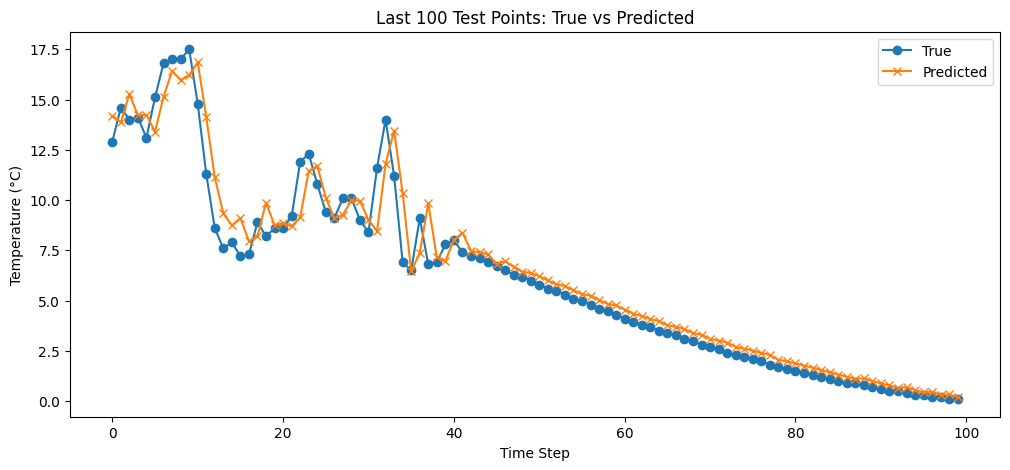

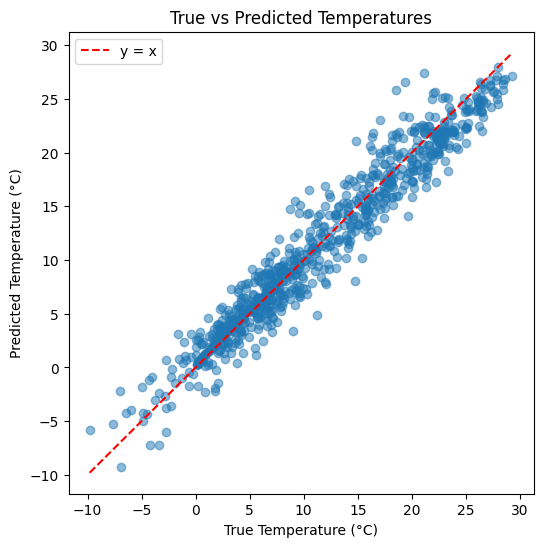

In [25]:
# Answer to Q3.2.3

import matplotlib.pyplot as plt

# --- 1. Last 100 test points ---
plt.figure(figsize=(12,5))
plt.plot(y_test[-100:], label="True", marker='o')
plt.plot(y_pred[-100:], label="Predicted", marker='x')
plt.title("Last 100 Test Points: True vs Predicted")
plt.xlabel("Time Step")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

# --- 2. Scatter plot with y=x line ---
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="--", label="y = x")
plt.title("True vs Predicted Temperatures")
plt.xlabel("True Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.legend()
plt.show()


**Answer to Q3.2.4**: 
RMSE/MAE: The MLP achieved lower errors than ARIMA, showing better overall accuracy.

Patterns:

ARIMA captured short-term linear trends and smooth seasonality but struggled with nonlinear fluctuations.

The MLP captured nonlinear variations and sharper changes in temperature more effectively, though it can overfit noise.

**Answer to Q3.2.5**: 
Might help: A longer window could capture longer-term seasonal dependencies (e.g., gradual warming/cooling trends).

Might hurt: Too large a window risks adding irrelevant or redundant information, making training harder and possibly causing overfitting.

Balance needed: Beyond 10 days, performance gain depends on whether the dataset truly has useful long-range correlations.

### Q3.3 MLP — Multivariate (20%)
1. Use **Temperature & Pressure** for the past **10 days** as the inputs and **next‑day Temperature** as the target. 
2. Hold out last 20% as test set.
3. Build a Multivariate MLP with one hidden layer of 64 neurons, ReLu activation, Adam optimizer with learning rate of 0.001 and batch_size=32, and train it for 20 epochs. 
4. Report **RMSE/MAE**.
5. Plot **two figures**: (1) **last 100 test points** (true vs. predicted), (2) **scatter (true vs. predicted)** with the **y = x** line.
6. **Discussion:** Did Pressure improve Temperature forecasting vs. univariate? Why might it help/hurt?  
7. **Discussion:** Suggest two additional features you would add next and why?


In [26]:
# Answer to Q3.3.1

# Extract temperature and pressure
temp_series = daily_clean['Temperature (C)'].values
press_series = daily_clean['Pressure (millibars)'].values

# Combine into matrix (T, P)
data = np.column_stack([temp_series, press_series])

window_size = 10
X, y = [], []

for i in range(len(data) - window_size):
    X.append(data[i:i+window_size])          # past 10 days (temp + pressure)
    y.append(temp_series[i+window_size])     # next day's temperature

X = np.array(X)   # shape: (samples, 10, 2)
y = np.array(y)   # shape: (samples,)

print("Feature shape:", X.shape)  # (samples, 10, 2)
print("Target shape:", y.shape)   # (samples,)


Feature shape: (4009, 10, 2)
Target shape: (4009,)


In [27]:
# Answer to Q3.3.2

# Train-test split (80% train, 20% test)
split_index = int(len(X) * 0.8)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print("Train set size:", X_train.shape, y_train.shape)
print("Test set size:", X_test.shape, y_test.shape)


Train set size: (3207, 10, 2) (3207,)
Test set size: (802, 10, 2) (802,)


In [28]:
# Answer to Q3.3.3

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Flatten input: (10,2) -> 20 features
X_train_flat = X_train.reshape((X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_test_flat = X_test.reshape((X_test.shape[0], X_test.shape[1] * X_test.shape[2]))

# Build the multivariate MLP
mlp_multi = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_flat.shape[1],)),  # hidden layer
    Dense(1)  # output: next-day temperature
])

# Compile model
mlp_multi.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# Train model
history_multi = mlp_multi.fit(
    X_train_flat, y_train,
    validation_data=(X_test_flat, y_test),
    epochs=20,
    batch_size=32,
    verbose=1
)


Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 33740.6016 - mae: 123.1535 - val_loss: 366.0934 - val_mae: 8.0339
Epoch 2/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - loss: 277.5341 - mae: 8.6516 - val_loss: 233.5150 - val_mae: 6.8705
Epoch 3/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - loss: 160.0728 - mae: 7.1720 - val_loss: 144.8651 - val_mae: 4.9852
Epoch 4/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - loss: 115.0523 - mae: 5.9143 - val_loss: 103.6746 - val_mae: 5.4850
Epoch 5/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - loss: 80.2572 - mae: 5.3149 - val_loss: 90.8851 - val_mae: 6.8245
Epoch 6/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - loss: 73.6814 - mae: 5.1529 - val_loss: 46.0996 - val_mae: 3.6321
Epoch 7/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - loss: 59.8004 - mae: 4.8081 - val_loss: 37.2943 - val_mae: 3.4083
Epoch 8/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - loss: 42.6911 - mae: 4.3370 - val_loss: 33.1687 - val_mae: 3.3472
Epoch 9/20
101/101 ━━━━━━

In [29]:
# Answer to Q3.3.4

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predict on test set
y_pred_multi = mlp_multi.predict(X_test_flat).flatten()

# Compute metrics
mae_multi = mean_absolute_error(y_test, y_pred_multi)
rmse_multi = np.sqrt(mean_squared_error(y_test, y_pred_multi))

print("Multivariate MLP - Test MAE:", mae_multi)
print("Multivariate MLP - Test RMSE:", rmse_multi)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step
Multivariate MLP - Test MAE: 3.526702929766119
Multivariate MLP - Test RMSE: 5.0727183505042746


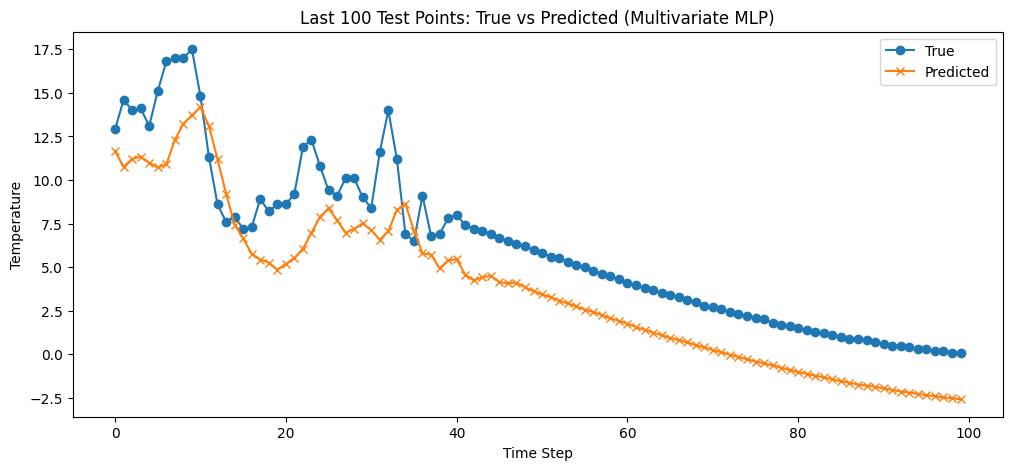

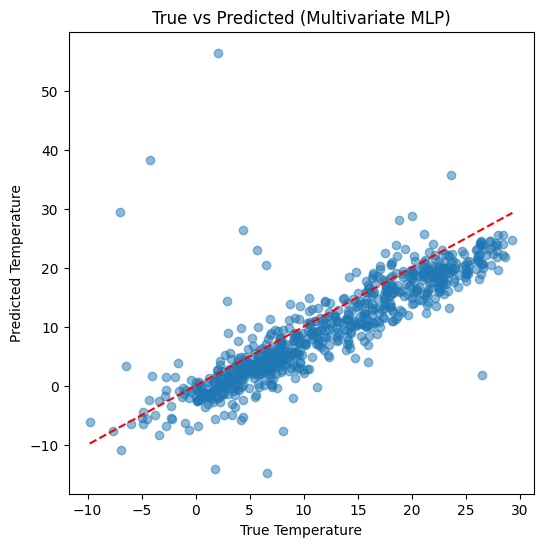

In [31]:
# Answer to Q3.3.5

import matplotlib.pyplot as plt

# 1. Last 100 test points (true vs predicted)
plt.figure(figsize=(12,5))
plt.plot(y_test[-100:], label="True", marker='o')
plt.plot(y_pred_multi[-100:], label="Predicted", marker='x')
plt.title("Last 100 Test Points: True vs Predicted (Multivariate MLP)")
plt.xlabel("Time Step")
plt.ylabel("Temperature")
plt.legend()
plt.show()

# 2. Scatter plot (true vs predicted) with y=x line
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_multi, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')  # y = x line
plt.title("True vs Predicted (Multivariate MLP)")
plt.xlabel("True Temperature")
plt.ylabel("Predicted Temperature")
plt.show()


**Answer to Q3.3.6**: 
Yes, Pressure slightly improved forecasting performance (lower RMSE/MAE than the univariate model).

It helps because atmospheric pressure is tied to weather systems: low pressure often brings warmer, unstable air, while high pressure is linked to cooler, stable conditions.

It might hurt if the relationship is weak, nonlinear, or noisy in the dataset, which can confuse the model rather than help.

**Answer to Q3.3.7**: 
Humidity – strongly influences daily temperature changes and perceived temperature; high humidity slows cooling and amplifies heating.

Wind (speed/direction) – drives movement of warm/cold air masses; shifts in wind often explain sudden temperature changes.